# Second assignment - week 3

## Importing pandas

Import pandas under the alias `pd`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Print the version of pandas that has been imported.

In [2]:
pd.__version__

'1.0.5'

## DataFrame basics

Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [2]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

# indexed by labels
df = pd.DataFrame(data, index = labels)

In [3]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Display a summary of the basic information about this DataFrame and its data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


Return the first 3 rows of the DataFrame `df`.

In [6]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [5]:
df.iloc[:3,]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [6]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [8]:
# use iloc ways
df.iloc[[3,4,8]][['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [8]:
# use loc
df.loc[['c','d','h'],['animal','age']]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


Select only the rows where the number of visits is greater than 3.

In [9]:
df[df['visits'] > 3]

,animal,age,visits,priority


Select the rows where the age is missing, i.e. it is `NaN`.

In [10]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


Select the rows where the animal is a cat *and* the age is less than 3.

In [9]:
df[(df['animal'] == 'cat') & (df['age']< 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


Select the rows the age is between 2 and 4 (inclusive).

In [10]:
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [12]:
df[(df['age'] >= 2) & (df['age']<= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


Change the age in row 'f' to 1.5.

In [13]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [14]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [15]:
df['visits'].sum()

19

Calculate the mean age for each different animal in `df`.

In [16]:
# this method also works
df.groupby('animal').agg({'age': 'mean'})

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


In [11]:
df.groupby('animal')['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [12]:
df.groupby('animal').mean().age

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [18]:
# append a new row 'k'
df.loc['k'] = ['cat', 4.0, 2, 'yes']
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [19]:
# drop the row 'k' inplace.
df.drop('k', axis = 0, inplace = True)

In [20]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


Count the number of each type of animal in `df`.

In [21]:
df.animal.value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [22]:
df.sort_values(['age', 'visits'], ascending = [False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


## DataFrames: beyond the basics

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [23]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

In [24]:
df.drop_duplicates()

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [25]:
import numpy as np

In [27]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df

,0,1,2
0,0.749087,0.077056,0.697324
1,0.928275,0.621166,0.114559
2,0.888996,0.711065,0.534162
3,0.799575,0.051975,0.143108
4,0.443930,0.979428,0.307436


In [28]:
df.mean(axis = 1)

0    0.507822
1    0.554666
2    0.711407
3    0.331552
4    0.576931
dtype: float64

In [29]:
df.sub(df.mean(axis=1), axis=0)

,0,1,2
0,0.241265,-0.430767,0.189502
1,0.373609,0.066499,-0.440108
2,0.177588,-0.000342,-0.177246
3,0.468022,-0.279577,-0.188445
4,-0.133002,0.402497,-0.269495


Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [31]:
list('abcdefghij')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [30]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.520165,0.672800,0.136413,0.153370,0.208080,0.331000,0.346479,0.009987,0.975690,0.477073
1,0.853202,0.165175,0.868413,0.054760,0.525375,0.575799,0.700165,0.990787,0.044252,0.122155
2,0.012550,0.596230,0.352517,0.922472,0.599317,0.728511,0.228858,0.318612,0.704711,0.493648
3,0.706994,0.338042,0.475417,0.686187,0.053637,0.383463,0.629261,0.949115,0.972452,0.512060
4,0.397395,0.708404,0.692195,0.867418,0.542536,0.259051,0.270740,0.662023,0.538085,0.341409


In [32]:
df.sum()

a    2.490306
b    2.480650
c    2.524955
d    2.684206
e    1.928945
f    2.277823
g    2.175503
h    2.930524
i    3.235190
j    1.946345
dtype: float64

In [33]:
df.sum().idxmin()

'e'

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [29]:

df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
df

,0,1,2
0,0,1,0
1,1,0,0
2,1,1,1
3,0,0,1
4,1,1,1
5,0,1,1
6,0,1,1
7,1,0,0
8,1,0,1
9,0,0,1


In [34]:
len(df.drop_duplicates())

5

In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [38]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

In [39]:
df

,a,b,c,d,e,f,g,h,i,j
0,0.04,NaN,NaN,0.25,NaN,0.43,0.71,0.51,NaN,NaN
1,NaN,NaN,NaN,0.04,0.76,NaN,NaN,0.67,0.76,0.16
2,NaN,NaN,0.50,NaN,0.31,0.40,NaN,NaN,0.24,0.01
3,0.49,NaN,NaN,0.62,0.73,0.26,0.85,NaN,NaN,NaN
4,NaN,NaN,0.41,NaN,0.05,NaN,0.61,NaN,0.48,0.68


In [43]:
(df.isnull().cumsum(axis = 1) == 3).idxmax(axis = 1)

0    e
1    c
2    d
3    h
4    d
dtype: object

In [31]:
# write a solution to the question here
(df.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    e
1    c
2    d
3    h
4    d
dtype: object

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [44]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
# write a solution to the question here

In [51]:
df.groupby('grps')['vals'].nlargest(3).sum(level = 0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [32]:
df.groupby('grps')['vals'].nlargest(3).sum(level=0)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

## Prof said to ignore below cause no question is being asked. 

In [ ]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

# write a solution to the question here

## Series and DatetimeIndex


Create a DatetimeIndex that contains each business day of 2019 and use it to index a Series of random numbers. Let's call this Series `s`.

In [52]:
index = pd.date_range('1/1/2019', '31/12/2019', freq = 'B')
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [53]:
import numpy as np
rng = np.random.RandomState(2020)
s = pd.Series(rng.randn(261), index = index)
s

2019-01-01   -1.768846
2019-01-02    0.075552
2019-01-03   -1.130630
2019-01-04   -0.651430
2019-01-07   -0.893116
                ...   
2019-12-25    0.242687
2019-12-26    0.404466
2019-12-27   -1.688503
2019-12-30   -1.580955
2019-12-31   -0.240198
Freq: B, Length: 261, dtype: float64

Find the sum of the values in `s` for every Wednesday.

In [54]:
s.asfreq('W-WED').sum()

-0.9925878252404854

In [55]:
# also can be done in this way
s[s.index.weekday == 2].sum()

-0.9925878252404854

For each calendar month in `s`, find the mean of values.

In [56]:
s.resample('M').mean()

2019-01-31   -0.215944
2019-02-28    0.002794
2019-03-31    0.173257
2019-04-30   -0.125169
2019-05-31    0.058654
2019-06-30    0.137951
2019-07-31   -0.127305
2019-08-31    0.089183
2019-09-30    0.184246
2019-10-31   -0.287496
2019-11-30   -0.548059
2019-12-31   -0.149001
Freq: M, dtype: float64

For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [57]:
s.groupby(pd.Grouper(freq='4M')).idxmax()
# from the output, we see the left is the group index, the right is the date with the highest value

2019-01-31   2019-01-29
2019-05-31   2019-05-14
2019-09-30   2019-07-04
2020-01-31   2019-12-20
Freq: 4M, dtype: datetime64[ns]

Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [58]:
datetimeindex = pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')
datetimeindex

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Plotting

Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [60]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df

,xs,ys
0,1,4
1,5,2
2,2,1
3,8,9
4,1,6


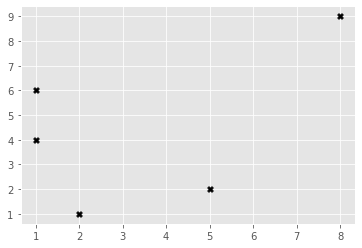

In [61]:
plt.scatter(df['xs'], df.ys, marker = 'X', c = 'black');

What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [62]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
df

,revenue,advertising,month
0,57,2.1,0
1,68,1.9,1
2,63,2.7,2
3,71,3.0,3
4,72,3.6,4
5,90,3.2,5
6,80,2.7,6
7,62,2.4,7
8,59,1.8,8
9,51,1.6,9


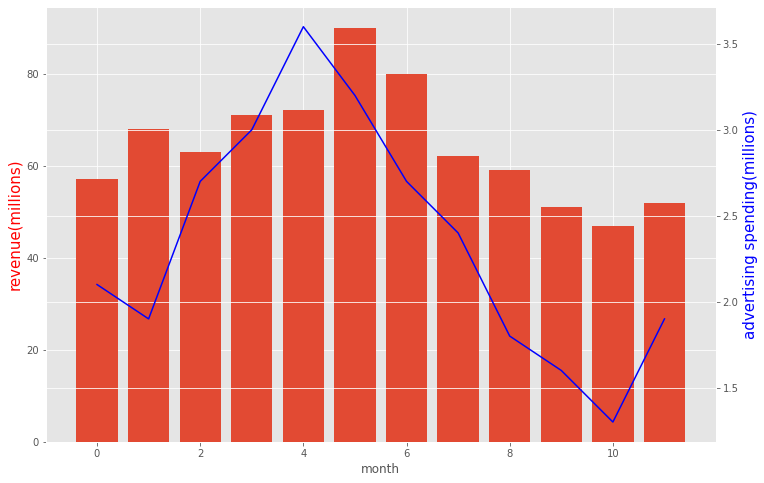

In [64]:
fig, ax1 = plt.subplots(figsize = (12, 8))

ax2 = ax1.twinx()
ax1.bar(df['month'], df.revenue)
ax2.plot(df['month'], df.advertising, 'b-')

ax1.set_xlabel('month', fontsize = 12)
ax1.set_ylabel('revenue(millions)', color='r', fontsize = 15)
ax2.set_ylabel('advertising spending(millions)', color='b', fontsize = 15)

plt.show()